In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df = df.drop(['arrival_date_week_number', 'agent', 'company','reservation_status_date'], axis = 1)

In [7]:
df.children = df.children.fillna(0)
df.country = df.country.fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [9]:
df = pd.get_dummies(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 259 entries, is_canceled to reservation_status_No-Show
dtypes: float64(2), int64(15), uint8(242)
memory usage: 43.0 MB


In [11]:
# Creating df_compact with only relevant columns for prediction of cancellation

In [13]:
# As seen in "Hotel_Cancellation_Feature_Correlations.ipynb" only "country_PRT" plays a role in cancellation rate and thus is kept here.

selected_cols = ('market_segment', 'distribution_channel', 'deposit_type', 'hotel')
filter_cols = [col for col in df if col.startswith(selected_cols)]
df_compact = df[['is_canceled', 'lead_time', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests', 'country_PRT']]
df2 = df[filter_cols]
df_compact = pd.concat([df_compact, df2], axis = 1)

<AxesSubplot:>

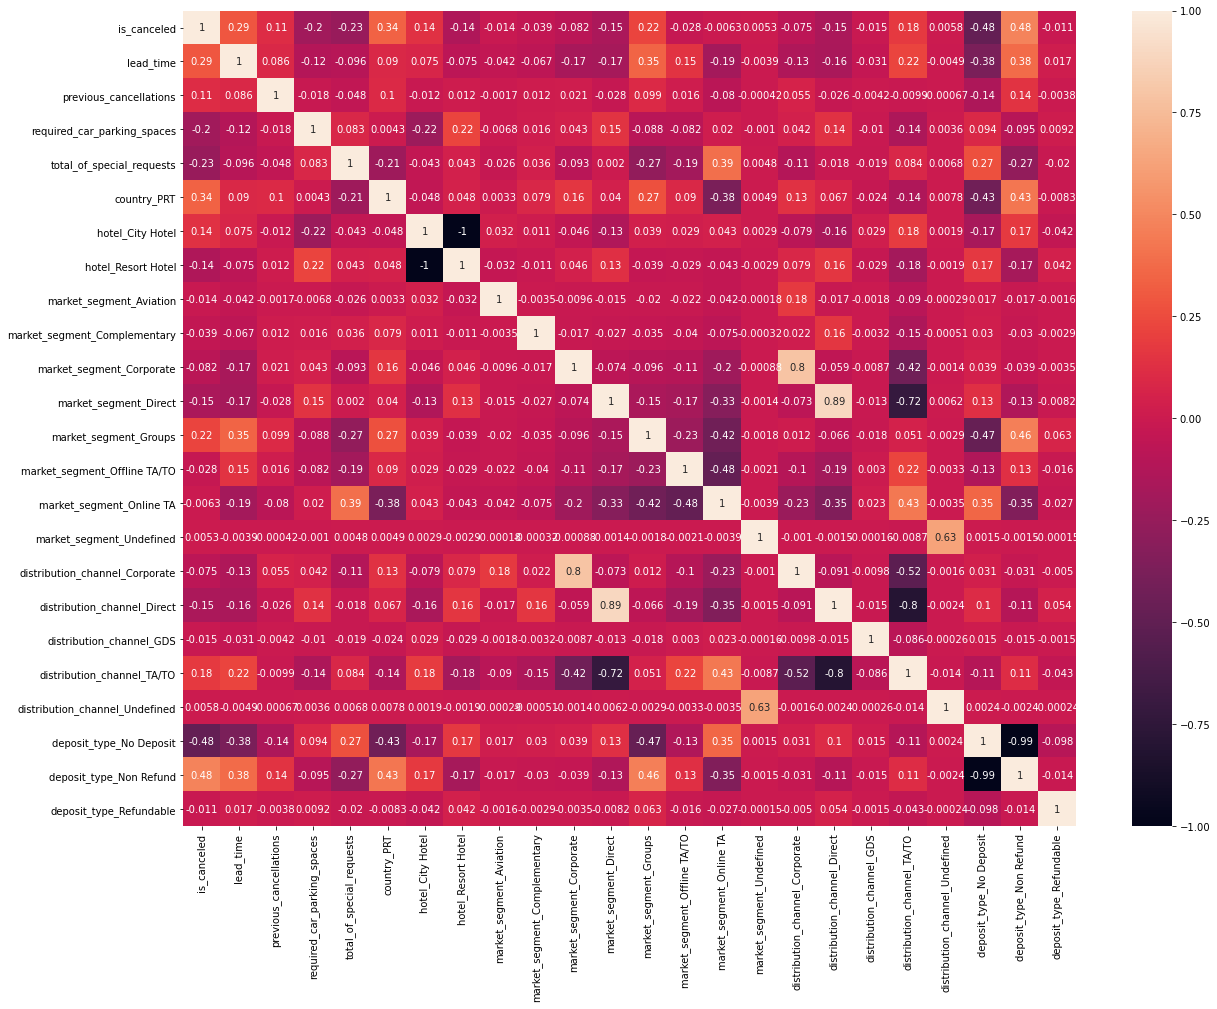

In [14]:
fig, ax = plt.subplots(figsize=(20, 15)) 
sns.heatmap(df_compact.corr(), annot=True, ax = ax)

In [15]:
# Cancellation Rate: df

In [16]:
# Cancellation prediction - all data (df) but without reservation_status

In [17]:
X = df.drop(['is_canceled', 'reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [19]:
# Normalization

X_norm = MinMaxScaler().fit(X_train)
X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

In [20]:
# Logistic Regression

In [21]:
model_lr = LogisticRegression().fit(X_train_norm, y_train)
model_lr_prediction = model_lr.predict(X_test_norm)
version_lr = accuracy_score(y_test, model_lr_prediction)
version_lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8141804171203618

In [22]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5861403550041657

Feature: 0, Score: 4.58609
Feature: 1, Score: 0.37136
Feature: 2, Score: -0.02157
Feature: 3, Score: 1.50078
Feature: 4, Score: 3.52484
Feature: 5, Score: 3.39220
Feature: 6, Score: 1.88716
Feature: 7, Score: 0.15431
Feature: 8, Score: -0.72063
Feature: 9, Score: 10.30004
Feature: 10, Score: -3.13228
Feature: 11, Score: -7.89042
Feature: 12, Score: -1.15453
Feature: 13, Score: 2.65795
Feature: 14, Score: -23.08953
Feature: 15, Score: -3.85718
Feature: 16, Score: -0.12093
Feature: 17, Score: -0.30939
Feature: 18, Score: 0.06048
Feature: 19, Score: -0.20257
Feature: 20, Score: 0.19521
Feature: 21, Score: 0.08872
Feature: 22, Score: -0.16761
Feature: 23, Score: -0.32624
Feature: 24, Score: -0.19410
Feature: 25, Score: -0.11457
Feature: 26, Score: -0.04564
Feature: 27, Score: 0.14702
Feature: 28, Score: 0.21161
Feature: 29, Score: -0.08264
Feature: 30, Score: -0.01848
Feature: 31, Score: 0.33705
Feature: 32, Score: -0.22850
Feature: 33, Score: 0.13812
Feature: 34, Score: -0.65851
Feature: 

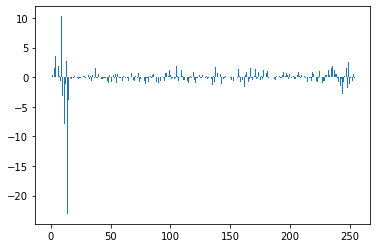

In [37]:
#Feature importance

feature_lr = []

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	feature_lr.append(v)
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [38]:
df.iloc[:,14]# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_lr)):
    if feature_lr[i]<0:
        feature_lr[i] = feature_lr[i]*(-1)

feature_lr = pd.DataFrame(feature_lr)
feature_lr.reset_index(inplace=True)
feature_lr.columns = ['feature', 'score']
feature_lr['feature_name'] = X.columns
feature_lr.sort_values(by=['score'], ascending = False, inplace=True)
feature_lr.reset_index(drop = True, inplace = True)
feature_lr

,feature,score,feature_name
0,14,23.089530,required_car_parking_spaces
1,9,10.300041,previous_cancellations
2,11,7.890419,booking_changes
3,0,4.586092,lead_time
4,15,3.857184,total_of_special_requests
...,...,...,...
250,211,0.000000,country_ZMB
251,155,0.000000,country_NAM
252,50,0.000000,country_BDI
253,184,0.000000,country_SMR


In [39]:
# Repeating Logistic Regression with top features

lr_top15_features = []
for i in range(15):
    lr_top15_features.append(feature_lr.feature_name[i])
lr_top15_features

['required_car_parking_spaces',
 'previous_cancellations',
 'booking_changes',
 'lead_time',
 'total_of_special_requests',
 'stays_in_week_nights',
 'adults',
 'previous_bookings_not_canceled',
 'assigned_room_type_I',
 'adr',
 'deposit_type_Non Refund',
 'country_ARE',
 'assigned_room_type_A',
 'country_HKG',
 'reserved_room_type_A']

In [40]:
df_lr_top15 = X[lr_top15_features]
df_lr_top15

,required_car_parking_spaces,previous_cancellations,booking_changes,lead_time,total_of_special_requests,stays_in_week_nights,adults,previous_bookings_not_canceled,assigned_room_type_I,adr,deposit_type_Non Refund,country_ARE,assigned_room_type_A,country_HKG,reserved_room_type_A
0,0,0,3,342,0,0,2,0,0,0.00,0,0,0,0,0
1,0,0,4,737,0,0,2,0,0,0.00,0,0,0,0,0
2,0,0,0,7,0,1,1,0,0,75.00,0,0,0,0,1
3,0,0,0,13,0,1,1,0,0,75.00,0,0,1,0,1
4,0,0,0,14,1,2,2,0,0,98.00,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,23,0,5,2,0,0,96.14,0,0,1,0,1
119386,0,0,0,102,2,5,3,0,0,225.43,0,0,0,0,0
119387,0,0,0,34,4,5,2,0,0,157.71,0,0,0,0,0
119388,0,0,0,109,0,5,2,0,0,104.40,0,0,1,0,1


In [41]:
# Logistic Regression with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_lr_top15, y, test_size = 0.2, random_state = 3)

model_lr_top15 = LogisticRegression().fit(X_train, y_train)
model_lr_top15_prediction = model_lr_top15.predict(X_test)
version_lr_top15 = accuracy_score(y_test, model_lr_top15_prediction)
version_lr_top15

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7740598040036853

In [42]:
kappa_lr_top15 = cohen_kappa_score(y_test, model_lr_top15_prediction)
kappa_lr_top15

0.4653630112981626

In [25]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train_norm, y_train)
model_dt_prediction = model_dt.predict(X_test_norm)
version_dt = accuracy_score(y_test, model_dt_prediction)
version_dt

0.8511181841025212

In [26]:
# Kappa
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.6811916285052004

Feature: 0, Score: 0.12008
Feature: 1, Score: 0.02992
Feature: 2, Score: 0.05576
Feature: 3, Score: 0.01756
Feature: 4, Score: 0.03015
Feature: 5, Score: 0.01075
Feature: 6, Score: 0.00390
Feature: 7, Score: 0.00067
Feature: 8, Score: 0.00063
Feature: 9, Score: 0.02080
Feature: 10, Score: 0.00560
Feature: 11, Score: 0.01565
Feature: 12, Score: 0.00099
Feature: 13, Score: 0.07871
Feature: 14, Score: 0.02325
Feature: 15, Score: 0.05437
Feature: 16, Score: 0.00428
Feature: 17, Score: 0.00485
Feature: 18, Score: 0.00385
Feature: 19, Score: 0.00738
Feature: 20, Score: 0.00322
Feature: 21, Score: 0.00335
Feature: 22, Score: 0.00276
Feature: 23, Score: 0.00519
Feature: 24, Score: 0.00398
Feature: 25, Score: 0.00360
Feature: 26, Score: 0.00543
Feature: 27, Score: 0.00288
Feature: 28, Score: 0.00367
Feature: 29, Score: 0.00335
Feature: 30, Score: 0.00406
Feature: 31, Score: 0.00104
Feature: 32, Score: 0.00349
Feature: 33, Score: 0.00316
Feature: 34, Score: 0.00062
Feature: 35, Score: 0.00012
Fe

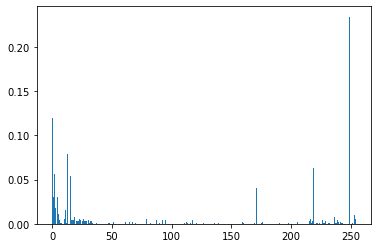

In [43]:
#Feature Importance

feature_dt = []

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_dt.append(v)
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_dt)):
    if feature_dt[i]<0:
        feature_dt[i] = feature_dt[i]*(-1)

feature_dt = pd.DataFrame(feature_dt)
feature_dt.reset_index(inplace=True)
feature_dt.columns = ['feature', 'score']
feature_dt['feature_name'] = X.columns
feature_dt.sort_values(by=['score'], ascending = False, inplace=True)
feature_dt.reset_index(drop = True, inplace = True)

dt_top15_features = []
for i in range(15):
    dt_top15_features.append(feature_dt.feature_name[i])

df_dt_top15 = X[dt_top15_features]
df_dt_top15

,deposit_type_Non Refund,lead_time,adr,market_segment_Online TA,arrival_date_day_of_month,total_of_special_requests,country_PRT,stays_in_week_nights,arrival_date_year,required_car_parking_spaces,previous_cancellations,stays_in_weekend_nights,booking_changes,adults,customer_type_Transient
0,0,342,0.00,0,1,0,1,0,2015,0,0,0,3,2,1
1,0,737,0.00,0,1,0,1,0,2015,0,0,0,4,2,1
2,0,7,75.00,0,1,0,0,1,2015,0,0,0,0,1,1
3,0,13,75.00,0,1,0,0,1,2015,0,0,0,0,1,1
4,0,14,98.00,1,1,1,0,2,2015,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,96.14,0,30,0,0,5,2017,0,0,2,0,2,1
119386,0,102,225.43,1,31,2,0,5,2017,0,0,2,0,3,1
119387,0,34,157.71,1,31,4,0,5,2017,0,0,2,0,2,1
119388,0,109,104.40,1,31,0,0,5,2017,0,0,2,0,2,1


In [45]:
# Decision Tree with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_dt_top15, y, test_size = 0.2, random_state = 3)

model_dt_top15 = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_top15_prediction = model_dt_top15.predict(X_test)
version_dt_top15 = accuracy_score(y_test, model_dt_top15_prediction)
version_dt_top15

0.8383030404556495

In [46]:
kappa_dt_top15 = cohen_kappa_score(y_test, model_dt_top15_prediction)
kappa_dt_top15

0.6543111794742347

Maximum:  0.9698492462311558
Mean:  0.8118233645857924


<AxesSubplot:>

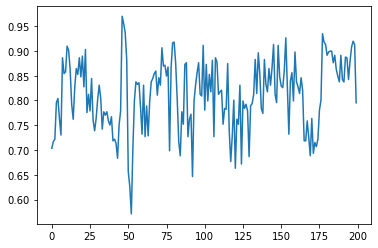

In [30]:
# K-Fold Decision Tree
model_kf_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =8), X, y, cv=200
print('Maximum: ', model_kf_dt.max())
print('Mean: ', model_kf_dt.mean())
model_kf_dt = pd.Series(model_kf_dt)
model_kf_dt.plot()

In [31]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2).fit(X_train, y_train)  # Best result with 4 neighbors
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.7844459334952676

In [32]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.5109003927336409

In [33]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train) # 800: 0.8902755674679621
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8907362425663791

In [34]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction) # 800: 0.759638961971176
kappa_rf

0.7605856207185087

Feature: 0, Score: 0.11423
Feature: 1, Score: 0.02453
Feature: 2, Score: 0.06003
Feature: 3, Score: 0.02652
Feature: 4, Score: 0.03981
Feature: 5, Score: 0.01429
Feature: 6, Score: 0.00661
Feature: 7, Score: 0.00090
Feature: 8, Score: 0.00268
Feature: 9, Score: 0.02776
Feature: 10, Score: 0.00406
Feature: 11, Score: 0.01933
Feature: 12, Score: 0.00313
Feature: 13, Score: 0.07797
Feature: 14, Score: 0.01945
Feature: 15, Score: 0.05479
Feature: 16, Score: 0.00718
Feature: 17, Score: 0.00690
Feature: 18, Score: 0.00576
Feature: 19, Score: 0.00714
Feature: 20, Score: 0.00417
Feature: 21, Score: 0.00472
Feature: 22, Score: 0.00365
Feature: 23, Score: 0.00694
Feature: 24, Score: 0.00579
Feature: 25, Score: 0.00523
Feature: 26, Score: 0.00606
Feature: 27, Score: 0.00390
Feature: 28, Score: 0.00539
Feature: 29, Score: 0.00470
Feature: 30, Score: 0.00685
Feature: 31, Score: 0.00089
Feature: 32, Score: 0.00498
Feature: 33, Score: 0.00381
Feature: 34, Score: 0.00099
Feature: 35, Score: 0.00033
Fe

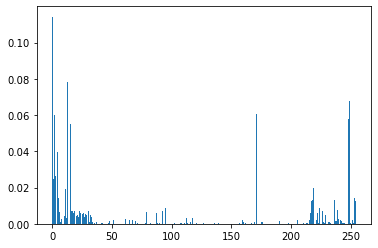

In [47]:
#Feature Importance

feature_rf = []

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_rf.append(v)
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_rf)):
    if feature_rf[i]<0:
        feature_rf[i] = feature_rf[i]*(-1)

feature_rf = pd.DataFrame(feature_rf)
feature_rf.reset_index(inplace=True)
feature_rf.columns = ['feature', 'score']
feature_rf['feature_name'] = X.columns
feature_rf.sort_values(by=['score'], ascending = False, inplace=True)
feature_rf.reset_index(drop = True, inplace = True)

rf_top15_features = []
for i in range(15):
    rf_top15_features.append(feature_rf.feature_name[i])

df_rf_top15 = X[rf_top15_features]
df_rf_top15

,lead_time,adr,deposit_type_Non Refund,country_PRT,arrival_date_day_of_month,deposit_type_No Deposit,total_of_special_requests,stays_in_week_nights,previous_cancellations,stays_in_weekend_nights,arrival_date_year,market_segment_Online TA,required_car_parking_spaces,booking_changes,adults
0,342,0.00,0,1,1,1,0,0,0,0,2015,0,0,3,2
1,737,0.00,0,1,1,1,0,0,0,0,2015,0,0,4,2
2,7,75.00,0,0,1,1,0,1,0,0,2015,0,0,0,1
3,13,75.00,0,0,1,1,0,1,0,0,2015,0,0,0,1
4,14,98.00,0,0,1,1,1,2,0,0,2015,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,96.14,0,0,30,1,0,5,0,2,2017,0,0,0,2
119386,102,225.43,0,0,31,1,2,5,0,2,2017,1,0,0,3
119387,34,157.71,0,0,31,1,4,5,0,2,2017,1,0,0,2
119388,109,104.40,0,0,31,1,0,5,0,2,2017,1,0,0,2


In [51]:
# Random Forest with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_rf_top15, y, test_size = 0.2, random_state = 3)

model_rf_top15 = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
model_rf_top15_prediction = model_rf_top15.predict(X_test)
version_rf_top15 = accuracy_score(y_test, model_rf_top15_prediction)
version_rf_top15

0.8736075048161488

In [52]:
kappa_rf_top15 = cohen_kappa_score(y_test, model_rf_top15_prediction)
kappa_rf_top15

0.723925307647856